## Assignment 4 - Tuning


### Assignment-4

**Objective:**

Understand and implement model evaluation using cross-validation and improve
model performance by hyperparameter tuning.



Step 1: Import Libraries and Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Set plot style
sns.set(style="whitegrid")

Step 2: Load Dataset and Prepare Features and Target

In [ ]:
diabetes = load_diabetes()
df = pd.DataFrame(data=np.c_[diabetes['data'], diabetes['target']],
                  columns=np.append(diabetes['feature_names'], ['target']))

print("First 5 rows of the diabetes dataset:")
display(df.head())

print("\nDataset Information:")
df.info()

First 5 rows of the diabetes dataset:


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


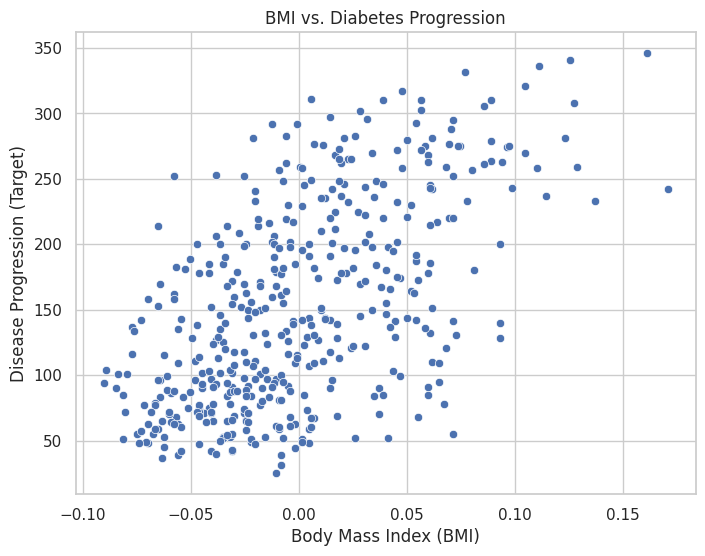

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='target', data=df)
plt.title('BMI vs. Diabetes Progression')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Disease Progression (Target)')
plt.show()

In [ ]:
X = diabetes.data
y = diabetes.target

print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

Shape of features (X): (442, 10)
Shape of target (y): (442,)


Step 3: Implement Cross-Validation

In [ ]:
model = Ridge(alpha=1.0) # Using a default Ridge model

# Perform cross-validation
# cv=5 means 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# The scores are negative, so we multiply by -1 to get the positive MSE
mse_scores = -scores

print(f"MSE for each of the 5 folds: {mse_scores}")
print(f"Average MSE from cross-validation: {mse_scores.mean():.2f}")
print(f"Standard Deviation of MSE: {mse_scores.std():.2f}")

MSE for each of the 5 folds: [3305.7074443  3549.8083555  3616.81389414 3018.38109447 3610.90958369]
Average MSE from cross-validation: 3420.32
Standard Deviation of MSE: 230.82


Step 4: Hyperparameter Tuning with GridSearchCV

In [ ]:
# Define the grid of alpha values to test
param_grid = {'alpha': np.logspace(-4, 2, 100)} # Test 100 values from 0.0001 to 100

# Set up the model
ridge = Ridge()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=ridge,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5,
                           verbose=1,
                           n_jobs=-1) # Use all available CPU cores

# Fit GridSearchCV to the data
grid_search.fit(X, y)

# Print the best parameters and the corresponding score
print(f"\nBest alpha parameter found: {grid_search.best_params_['alpha']:.4f}")
print(f"Best cross-validated MSE: {-grid_search.best_score_:.2f}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits

Best alpha parameter found: 0.0005
Best cross-validated MSE: 2992.99


Step 5: Evaluate Best Model on Full Dataset

In [ ]:
# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the entire dataset
y_pred = best_model.predict(X)

# Calculate final evaluation metrics
final_mse = mean_squared_error(y, y_pred)
final_r2 = r2_score(y, y_pred)

print(f"Final Mean Squared Error (MSE) on the full dataset: {final_mse:.2f}")
print(f"Final R-squared (R²) score on the full dataset: {final_r2:.4f}")

Final Mean Squared Error (MSE) on the full dataset: 2859.76
Final R-squared (R²) score on the full dataset: 0.5177


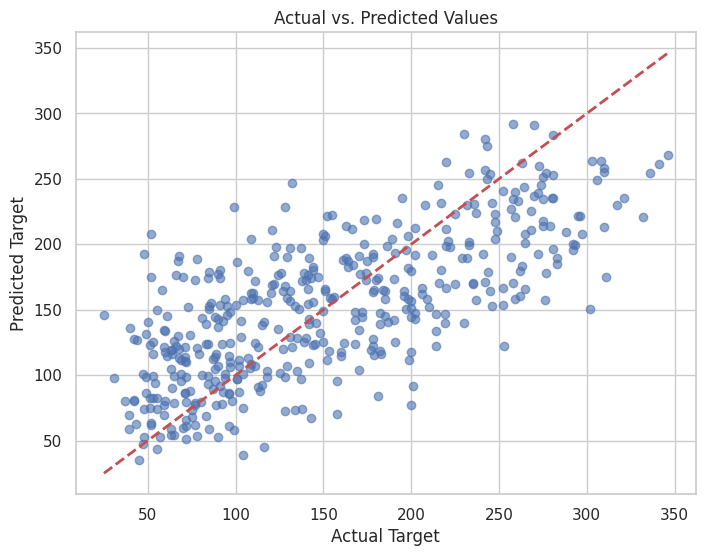

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2) # 45-degree line
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.show()